### Table of Contents
- [Introduction](#introduction)
- [1. Loading dataset and libraries](#loading)
- [2. Preprocessing](#preprocessing)
    - [2.1 Application record](#app-record)
    - [2.2 Credit record](#credit-record)
- [3. Data exploration](#exploration)
    - [3.1 Correlation matrix](#corr-matrix)
    - [3.2 Label Encoder](#label-enc)
    - [3.3 Data visualization](#data-viz)
- [4. K-Means](#k-means)
    - [4.1 Elbow method](#elbow-1)
    - [4.2 2D Clustering](#k-means-2d-cluster)
    - [4.3 3D Clustering](#k-means-3d-cluster)
    - [4.4 Silhouette score](#silhouette-1)
    - [4.5 PCA](#pca-1)
        - [4.5.1 PCA and Variance %](#pca-2)
- [5. Hierarchical Clustering](#hierarchy)
- [6. Gaussian Mixture Models](#gauss)
- [7. Cluster Analysis - K-Means](#analysis)
- [8. Conclusion](#conclusion)

## Introduction <a name="introduction" />
### Danijel Sokolovic
### Indeks: 1392

**Feature** - *Explanation - Remarks*

**ID** - *Client number*\
**CODE_GENDER**	- *Gender*\
**FLAG_OWN_CAR** - *Is there a car*\
**FLAG_OWN_REALTY** - *Is there a property*\	
**CNT_CHILDREN** - *Number of children*\
**AMT_INCOME_TOTAL** - *Annual income*\
**NAME_INCOME_TYPE** - *Income category*\
**NAME_EDUCATION_TYPE** - *Education level*\	
**NAME_FAMILY_STATUS** - *Marital status*\
**NAME_HOUSING_TYPE** - *Way of living*\
**DAYS_BIRTH** - *Birthday - Count backwards from current day (0), -1 means yesterday*\
**DAYS_EMPLOYED** - *Start date of employment - Count backwards from current day(0). If positive, it means the person currently unemployed.*\
**FLAG_MOBIL** - *Is there a mobile phone*\
**FLAG_WORK_PHONE** - *Is there a work phone*\	
**FLAG_PHONE** - *Is there a phone*\
**FLAG_EMAIL** - *Is there an email*\	
**OCCUPATION_TYPE** - *Occupation*\
**CNT_FAM_MEMBERS** - *Family size*\

## 1. Loading dataset and libraries <a name="loading" />

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from pprint import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
app_df = pd.read_csv("application_record.csv")
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [337]:
app_df.shape

(438557, 18)

## 2. Preprocessing <a name="preprocessing"/>

### 2.1 Application record <a name="app-record"/>

Radimo proveru tipova, i vidimo da ima 8 kolona koje su tipa object.

In [338]:
app_df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Sada mozemo za sve kolone koje su tipa object da izvucemo uniques.

In [339]:
for c in app_df.select_dtypes(include=['object']).columns:
    print("Unique values in {}: {}, count: {}".format(c, app_df[c].unique(), len(app_df[c].unique())))

Unique values in CODE_GENDER: ['M' 'F'], count: 2
Unique values in FLAG_OWN_CAR: ['Y' 'N'], count: 2
Unique values in FLAG_OWN_REALTY: ['Y' 'N'], count: 2
Unique values in NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student'], count: 5
Unique values in NAME_EDUCATION_TYPE: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree'], count: 5
Unique values in NAME_FAMILY_STATUS: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow'], count: 5
Unique values in NAME_HOUSING_TYPE: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment'], count: 6
Unique values in OCCUPATION_TYPE: [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 

Radimo proveru nan vrednosti kroz ceo dataset.

In [340]:
app_df.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

Vidimo da samo OCCUPATION_TYPE ima nan vrednosti.

In [341]:
app_df[['OCCUPATION_TYPE']].isna().sum()

OCCUPATION_TYPE    134203
dtype: int64

Nakon pregleda, vidimo da ima 134203 redova sa nan vrednostima. Posto oni koji imaju NAME_INCOME_TYPE=Pensioner ne mogu da imaju OCCUPATION_TYPE, mozemo da zakljucimo da oni treba da imaju Pension, jer su u penziji. Ovo ce smanjiti broj nan vrednosti.

In [342]:
app_df.loc[app_df.NAME_INCOME_TYPE == 'Pensioner', 'OCCUPATION_TYPE'] = 'Pension'

In [343]:
app_df[['OCCUPATION_TYPE']].isna().sum()

OCCUPATION_TYPE    58846
dtype: int64

Vidimo da smo vise od polovine nan vrednosti izbacili, odnosno pretvorili u Pension, za one koji primaju penziju, i ne mogu imati OCCUPATION_TYPE. Ostalo je jos 58846 nan vrednosti.

In [344]:
app_df.fillna('Unknown', inplace=True)

In [345]:
app_df.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

Sve preostale nan vrednosti smo zamenili za Unknown. Na taj nacin, situacija je malo bliza realnoj, a to je da stvarno ne znamo izvore prihoda ili zanimanja za odredjene ljude. Tu je stavljeno Unknown.

In [346]:
app_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,Pension,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,Pension,2.0


In [347]:
duplicates = app_df.duplicated().sum()
duplicates

0

Nema duplikata.

In [348]:
app_df.sort_values('ID', inplace=True)

Sortiramo po ID jer ce nam biti zgodnije za kasnije.

### 2.2 Credit record <a name="credit-record"/>

In [349]:
credit_df = pd.read_csv("credit_record.csv")
credit_df.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


MONTHS_BALANCE:\
record month: The month of the extracted data is the starting point, backwards, \
0 is the current month, \
-1 is the previous month, and so on.\
STATUS:\
0: 1-29 days past due \
1: 30-59 days past due \
2: 60-89 days overdue \
3: 90-119 days overdue \
4: 120-149 days overdue \
5: Overdue or bad debts, write-offs for more than 150 days \
C: paid off that month \
X: No loan for the month

In [350]:
credit_df.sort_values('ID', inplace=True)
credit_df.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
21,5001712,-17,0
20,5001712,-16,0
19,5001712,-15,0
18,5001712,-14,0
17,5001712,-13,0


In [351]:
credit_df['STATUS'].unique()

array(['X', '0', 'C', '1', '3', '2', '4', '5'], dtype=object)

In [352]:
credit_df['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3, -18, -17, -16, -15, -14, -13, -11, -10,  -9,
       -12,  -7,  -6,  -5,  -4,  -8, -20, -19, -21, -44, -43, -42, -41,
       -40, -39, -35, -37, -36, -34, -32, -33, -38, -45, -58, -47, -48,
       -49, -50, -51, -52, -53, -54, -55, -56, -57, -59, -31, -46, -30,
       -28, -29, -27, -25, -24, -23, -22, -26, -60])

Ovde mozemo rucno da uradimo encoding, tako sto znamo da su X i C "dobri signali", dok su 0-5 "losi signali". positive = 1, negative = 0

In [353]:
credit_df.loc[credit_df['STATUS'] == '0', 'STATUS'] = 'negative'
credit_df.loc[credit_df['STATUS'] == '1', 'STATUS'] = 'negative'
credit_df.loc[credit_df['STATUS'] == '2', 'STATUS'] = 'negative'
credit_df.loc[credit_df['STATUS'] == '3', 'STATUS'] = 'negative'
credit_df.loc[credit_df['STATUS'] == '4', 'STATUS'] = 'negative'
credit_df.loc[credit_df['STATUS'] == '5', 'STATUS'] = 'negative'
credit_df.loc[credit_df['STATUS'] == 'X', 'STATUS'] = 'positive'
credit_df.loc[credit_df['STATUS'] == 'C', 'STATUS'] = 'positive'

credit_df.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,positive
1,5001711,-1,negative
2,5001711,-2,negative
3,5001711,-3,negative
22,5001712,-18,negative
21,5001712,-17,negative
20,5001712,-16,negative
19,5001712,-15,negative
18,5001712,-14,negative
17,5001712,-13,negative


Sada mozemo da prebrojimo uz value_counts koliko ima positives a koliko negatives po svakom ID.

In [354]:
credit_df = credit_df.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0).reset_index()
credit_df.head(20)

STATUS,ID,negative,positive
0,5001711,3,1
1,5001712,10,9
2,5001713,0,22
3,5001714,0,15
4,5001715,0,60
5,5001717,17,5
6,5001718,26,13
7,5001719,2,41
8,5001720,36,0
9,5001723,8,23


Sada mozemo dodati novu kolonu NP_SCORE koja ce predstavljati razliku positives i negatives. Sto je veci broj, veci je "pozitivni signal" za odredjeni ID, i obrnuto.

In [355]:
credit_df['NP_SCORE'] = credit_df['positive'] - credit_df['negative']
credit_df.head(20)

STATUS,ID,negative,positive,NP_SCORE
0,5001711,3,1,-2
1,5001712,10,9,-1
2,5001713,0,22,22
3,5001714,0,15,15
4,5001715,0,60,60
5,5001717,17,5,-12
6,5001718,26,13,-13
7,5001719,2,41,39
8,5001720,36,0,-36
9,5001723,8,23,15


In [356]:
credit_df['NP_SCORE_BINARY'] = np.where(credit_df['NP_SCORE']>=0, 1, 0)
credit_df

STATUS,ID,negative,positive,NP_SCORE,NP_SCORE_BINARY
0,5001711,3,1,-2,0
1,5001712,10,9,-1,0
2,5001713,0,22,22,1
3,5001714,0,15,15,1
4,5001715,0,60,60,1
...,...,...,...,...,...
45980,5150482,12,6,-6,0
45981,5150483,0,18,18,1
45982,5150484,12,1,-11,0
45983,5150485,2,0,-2,0


Dodatno, dodali smo jos jednu kolonu NP_SCORE_BINARY, koja jasnije kaze ko je "dobar" a ko "los" kandidat. Ako je NP_SCORE >= 0 onda je vrednost 1. U suprotnom vrednost je 0. Ovo ce mozda da pruzi jasniji uvid, ali cemo svakako probati testove i sa NP_SCORE.

## 3. Data exploration <a name="exploration" />

In [357]:
app_df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [358]:
print("application rows: " + str(len(app_df.index)))
print("credit rows: " + str(len(credit_df.index)))

application rows: 438557
credit rows: 45985


Ovde sam odlucio da koristim samo ono sto imam i ne popunjavam vrednosti koje nedostaju.

In [359]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


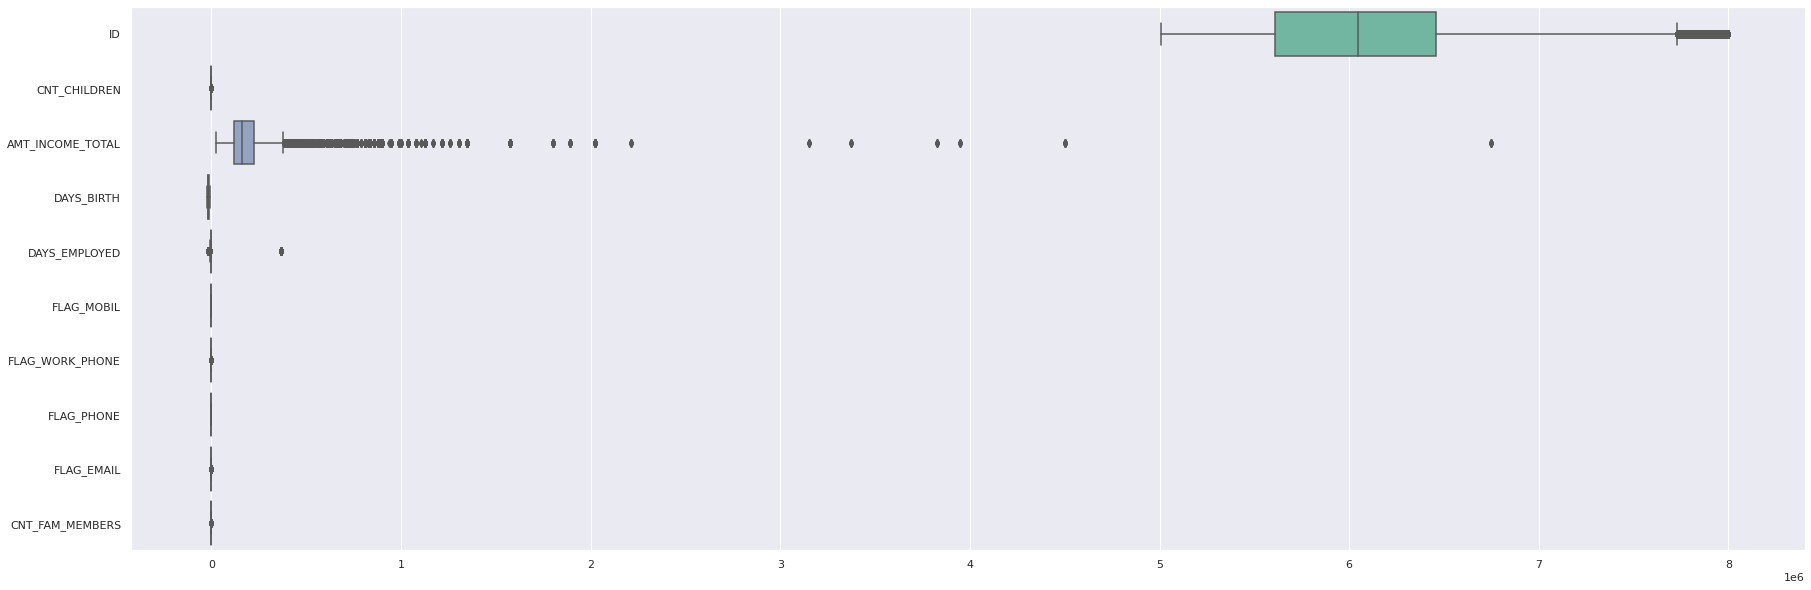

In [360]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.boxplot(data=app_df, orient="h", palette="Set2")

AMT_INCOME_TOTAL ima mnogo velike vrednosti, ali posto se radi o stranoj drzavi mozemo da zanemarimo ovo, jer je stvarno moguce da neko toliko zaradjuje godisnje. Ono sto ne mozemo da zanemarimo je DAYS_EMPLOYED outliers, gde cak i iz describe metode vidimo da je max vrednost preko 365000, sto je preko 1000 godina.

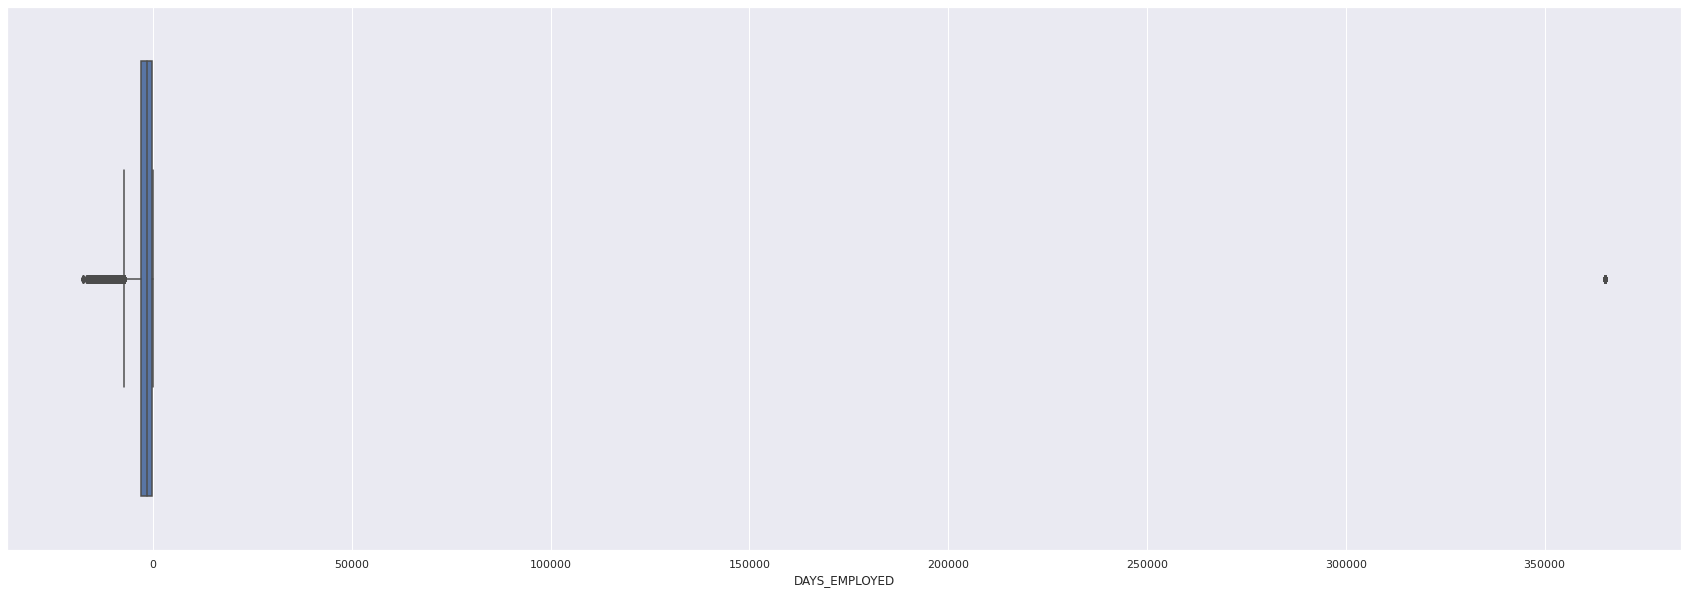

In [361]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.boxplot(x=app_df["DAYS_EMPLOYED"])

Vidimo i potvrdjujemo da na desnoj strani slike stvarno postoje vrednosti preko 350K. Ove vrednosti ce biti uklonjene jer je ocigledno greska u datasetu.

In [362]:
app_df = app_df[app_df.DAYS_EMPLOYED < 350000]
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.632280e+05,363228.000000,3.632280e+05,363228.000000,363228.000000,363228.0,363228.000000,363228.000000,363228.000000,363228.000000
mean,6.022768e+06,0.507483,1.945939e+05,-14812.161711,-2623.052700,1.0,0.248882,0.286635,0.118815,2.290503
std,5.704994e+05,0.764181,1.141686e+05,3501.319668,2399.514253,0.0,0.432366,0.452190,0.323571,0.926890
min,5.008804e+06,0.000000,2.700000e+04,-24834.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.617530e+06,0.000000,1.350000e+05,-17455.000000,-3512.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047768e+06,0.000000,1.800000e+05,-14580.000000,-1924.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.448705e+06,1.000000,2.250000e+05,-11938.000000,-915.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,-12.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [363]:
mdf = app_df.merge(credit_df, how='inner', on=['ID'])
mdf

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,negative,positive,NP_SCORE,NP_SCORE_BINARY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,2,14,12,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,2,13,11,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,7,23,16,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,2,3,1,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,0,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30317,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Core staff,3.0,12,6,-6,0
30318,5150483,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Core staff,3.0,0,18,18,1
30319,5150484,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Core staff,3.0,12,1,-11,0
30320,5150485,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Core staff,3.0,2,0,-2,0


### 3.1 Correlation matrix <a name="corr-matrix"/>

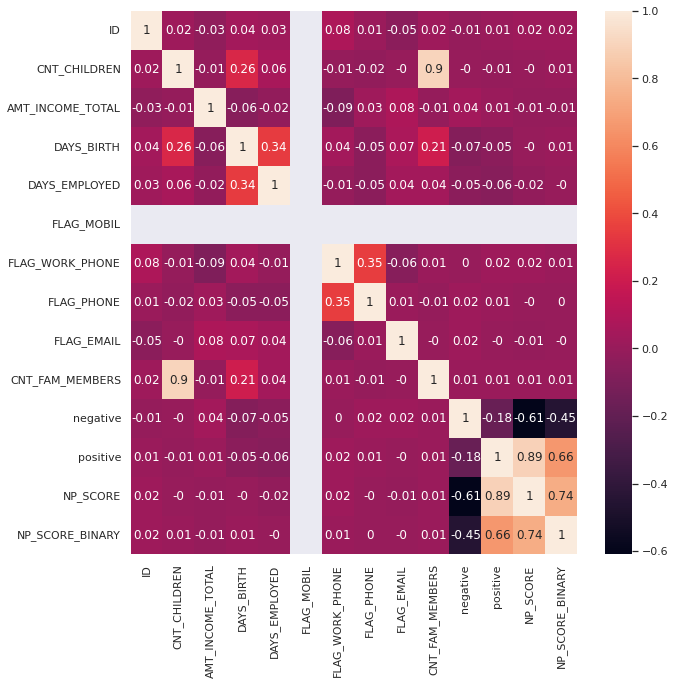

In [364]:
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix = mdf.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Iz korelacione matrice vidimo da ne postoje neke jake korelacije sem ociglednih, za koje smo znali da ce ih biti, a to su negative, positive, NP_SCORE i NP_SCORE_BINARY.

### 3.2 Label Encoder <a name="label-enc"/>

In [365]:
label_encoder = preprocessing.LabelEncoder()
mdf['NAME_EDUCATION_TYPE_ENC'] = label_encoder.fit_transform(mdf['NAME_EDUCATION_TYPE'])
mdf['OCCUPATION_TYPE_ENC'] = label_encoder.fit_transform(mdf['OCCUPATION_TYPE'])
mdf['NAME_INCOME_TYPE_ENC'] = label_encoder.fit_transform(mdf['NAME_INCOME_TYPE'])
mdf

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,negative,positive,NP_SCORE,NP_SCORE_BINARY,NAME_EDUCATION_TYPE_ENC,OCCUPATION_TYPE_ENC,NAME_INCOME_TYPE_ENC
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Unknown,2.0,2,14,12,1,1,18,4
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Unknown,2.0,2,13,11,1,1,18,4
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2.0,7,23,16,1,4,17,4
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,2,3,1,1,4,15,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1.0,0,5,5,1,4,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30317,5150482,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Core staff,3.0,12,6,-6,0,4,3,4
30318,5150483,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Core staff,3.0,0,18,18,1,4,3,4
30319,5150484,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Core staff,3.0,12,1,-11,0,4,3,4
30320,5150485,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Core staff,3.0,2,0,-2,0,4,3,4


### 3.3 Data visualization <a name="data-viz"/>

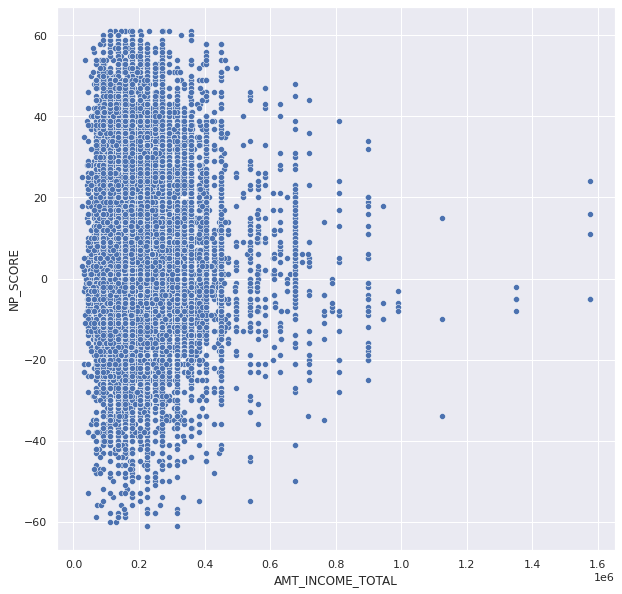

In [366]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_theme(style='darkgrid')
sns.scatterplot(x=mdf.AMT_INCOME_TOTAL, y=mdf.NP_SCORE, data=mdf)

plt.show()

Ne vidimo nista cudno, NP_SCORE je ravnomerno raspodeljen po AMT_INCOME_TOTAL. Najveci deo se nalazi do 0.5 a onda dalje ima sve manje i manje onih koji imaju najveca primanja.

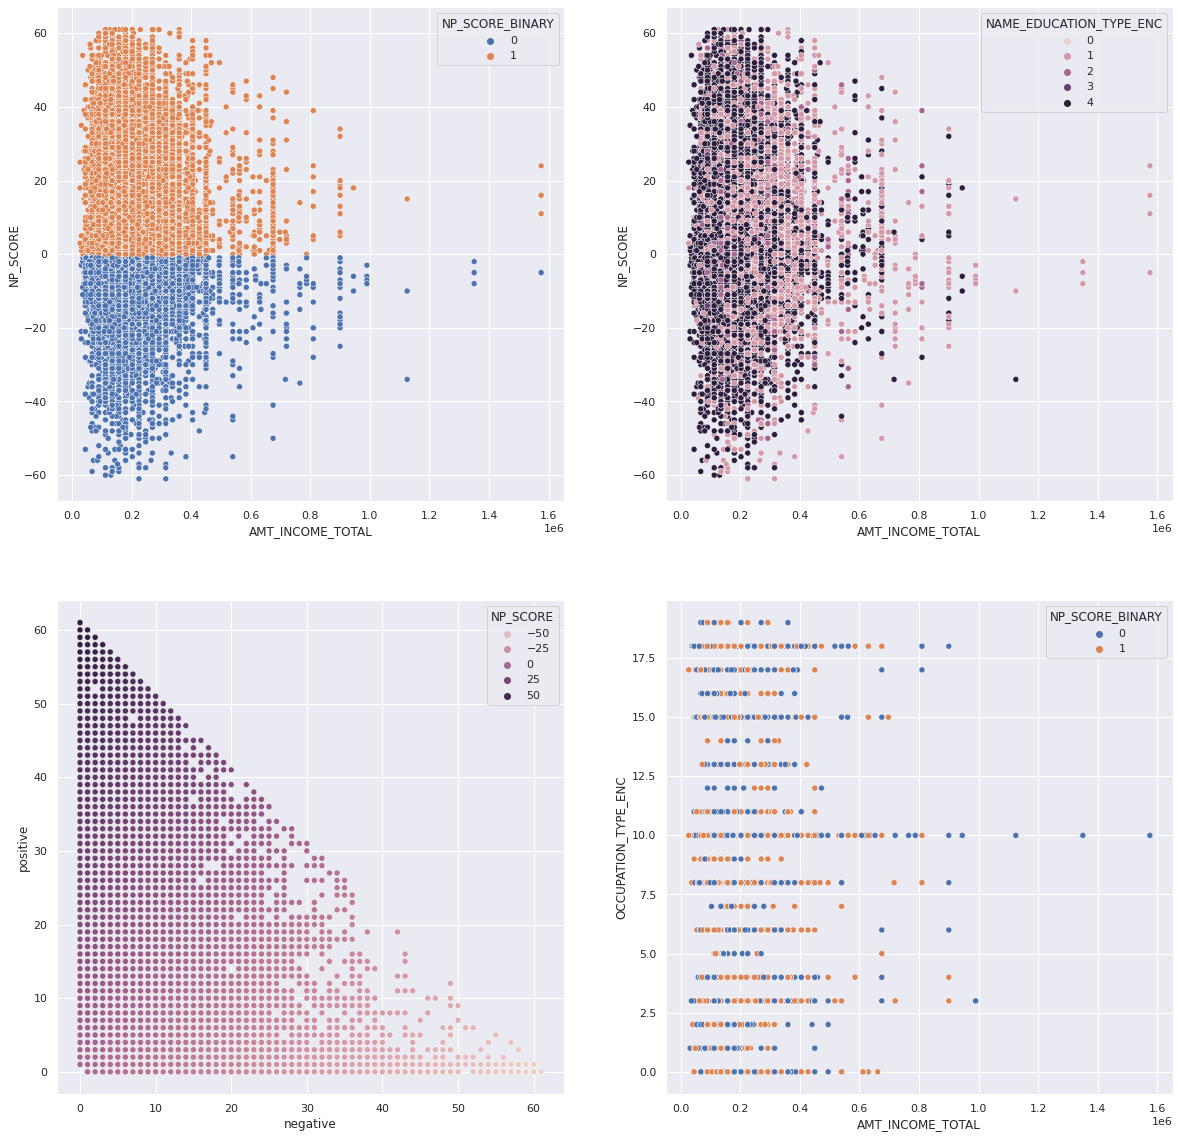

In [367]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

sns.set_theme(style='darkgrid')
sns.scatterplot(ax=ax[0][0], x=mdf.AMT_INCOME_TOTAL, y=mdf.NP_SCORE, hue=mdf.NP_SCORE_BINARY, data=mdf)
sns.scatterplot(ax=ax[0][1], x=mdf.AMT_INCOME_TOTAL, y=mdf.NP_SCORE, hue=mdf.NAME_EDUCATION_TYPE_ENC, data=mdf)
sns.scatterplot(ax=ax[1][0], x=mdf.negative, y=mdf.positive, hue=mdf.NP_SCORE, data=mdf)
sns.scatterplot(ax=ax[1][1], x=mdf.AMT_INCOME_TOTAL, y=mdf.OCCUPATION_TYPE_ENC, hue=mdf.NP_SCORE_BINARY, data=mdf)


plt.show()

Na slikama se ne mogu uociti neki jasni clusteri, sem na prvoj slici, sto je i ocekivano jer je NP_SCORE ili positive ili negative. Jedini zakljucak koji se moze izvesti je da je broj positives vs. negatives priblizno isti i da su prilicno ravnomerno rasporedjeni u odnosu na AMT_INCOME_TOTAL.

In [368]:
mdf.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'negative',
       'positive', 'NP_SCORE', 'NP_SCORE_BINARY', 'NAME_EDUCATION_TYPE_ENC',
       'OCCUPATION_TYPE_ENC', 'NAME_INCOME_TYPE_ENC'],
      dtype='object')

## 4. K-Means <a name="k-means"/>

K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by ‘K’ in K-means.

In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum. It is to be understood that less variation within the clusters will lead to more similar data points within same cluster.

We can understand the working of K-Means clustering algorithm with the help of following steps −

    1 − First, we need to specify the number of clusters, K, need to be generated by this algorithm.
    2 − Next, randomly select K data points and assign each data point to a cluster. In simple words, classify the data based on the number of data points.
    3 − Now it will compute the cluster centroids.
    4 − Next, keep iterating the following until we find optimal centroid which is the assignment of data points to the clusters that are not changing any more

    4.1 − First, the sum of squared distance between data points and centroids would be computed.
    4.2 − Now, we have to assign each data point to the cluster that is closer than other cluster (centroid).
    4.3 − At last compute the centroids for the clusters by taking the average of all data points of that cluster.

K-means follows Expectation-Maximization approach to solve the problem. The Expectation-step is used for assigning the data points to the closest cluster and the Maximization-step is used for computing the centroid of each cluster.

While working with K-means algorithm we need to take care of the following things −

While working with clustering algorithms including K-Means, it is recommended to standardize the data because such algorithms use distance-based measurement to determine the similarity between data points.

Due to the iterative nature of K-Means and random initialization of centroids, K-Means may stick in a local optimum and may not converge to global optimum. That is why it is recommended to use different initializations of centroids.

In [369]:
kdf =  mdf[['AMT_INCOME_TOTAL', 
            'DAYS_BIRTH', 
            'DAYS_EMPLOYED', 
            'NP_SCORE', 
            #'NP_SCORE_BINARY',
            'NAME_EDUCATION_TYPE_ENC', 
            'OCCUPATION_TYPE_ENC', 
            'NAME_INCOME_TYPE_ENC']]
kdf

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NP_SCORE,NAME_EDUCATION_TYPE_ENC,OCCUPATION_TYPE_ENC,NAME_INCOME_TYPE_ENC
0,427500.0,-12005,-4542,12,1,18,4
1,427500.0,-12005,-4542,11,1,18,4
2,112500.0,-21474,-1134,16,4,17,4
3,270000.0,-19110,-3051,1,4,15,0
4,270000.0,-19110,-3051,5,4,15,0
...,...,...,...,...,...,...,...
30317,157500.0,-10808,-1739,-6,4,3,4
30318,157500.0,-10808,-1739,18,4,3,4
30319,157500.0,-10808,-1739,-11,4,3,4
30320,157500.0,-10808,-1739,-2,4,3,4


### 4.1 Elbow method <a name="elbow-1"/>

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

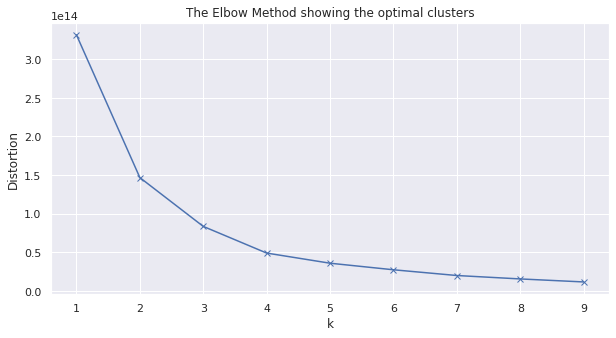

In [370]:
x = kdf.iloc[:, :]
x  = np.array(x)

# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)
# Plotting the distortions
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

### 4.2 2D Clustering <a name="k-means-2d-cluster"/>

In [371]:
X = kdf
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

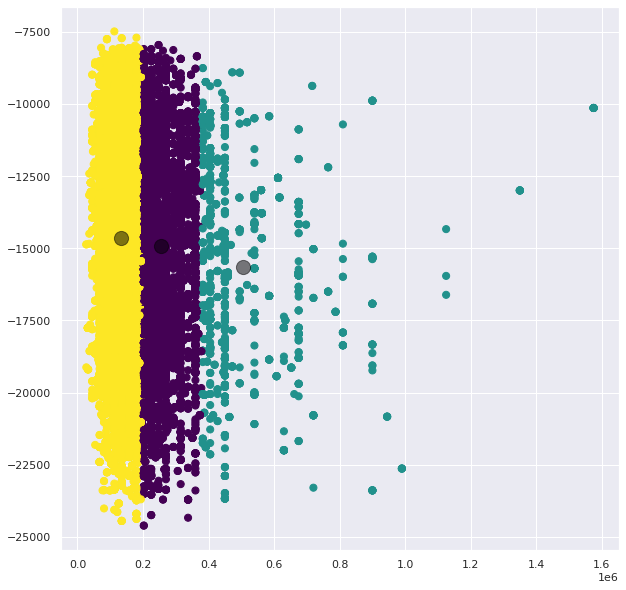

In [372]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [373]:
print(x[y_kmeans == 0,0][1])
print(x[y_kmeans == 0,1][1])
print(x[y_kmeans == 0,2][1])

270000.0
-19110.0
-3051.0


### 4.3 3D Clustering <a name="k-means-3d-cluster"/>

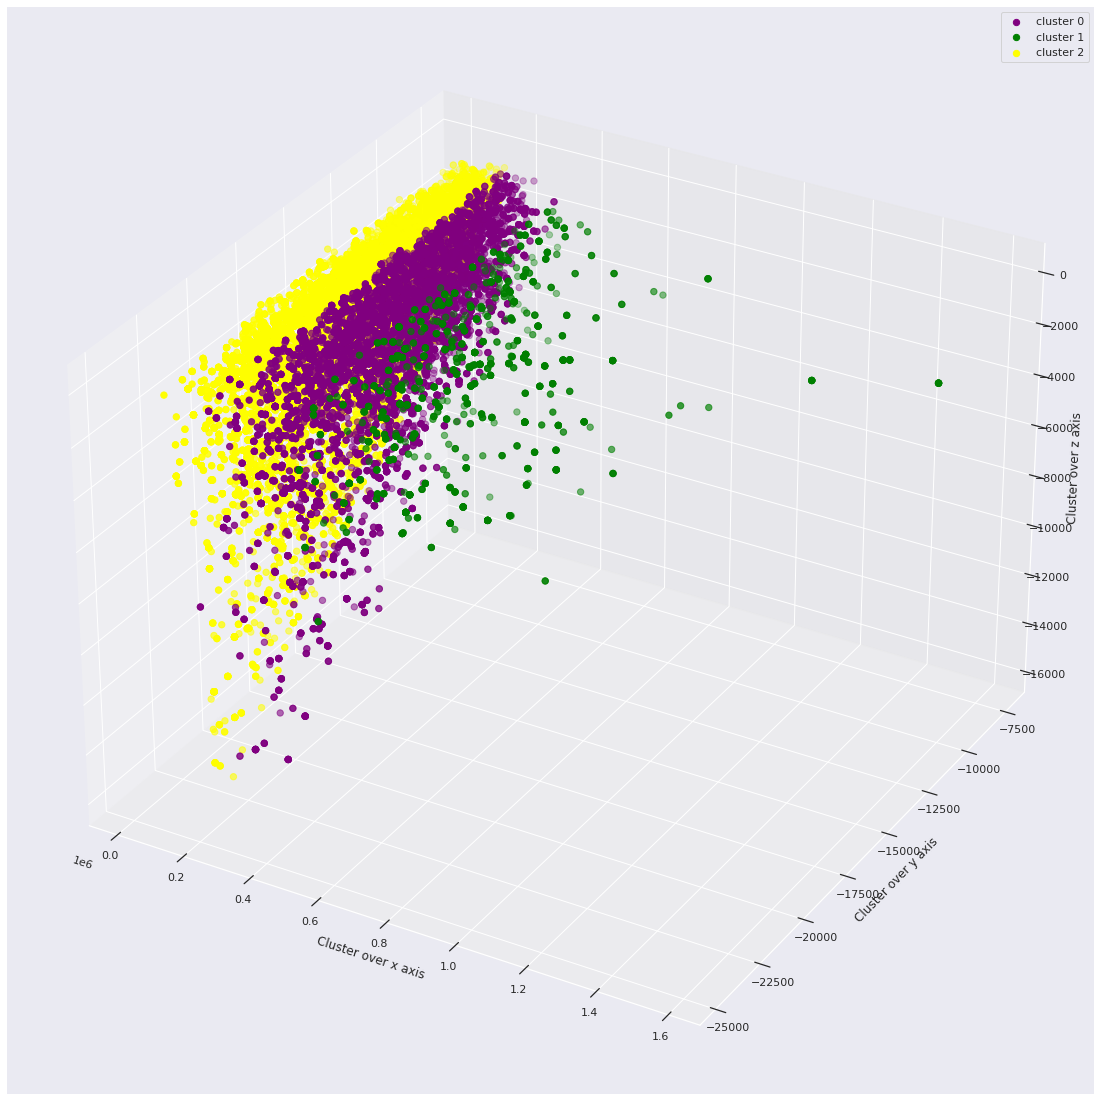

In [374]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],x[y_kmeans == 0,2], s = 40 , color = 'purple', label = "cluster 0")
ax.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],x[y_kmeans == 1,2], s = 40 , color = 'green', label = "cluster 1")
ax.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],x[y_kmeans == 2,2], s = 40 , color = 'yellow', label = "cluster 2")
ax.set_xlabel('Cluster over x axis')
ax.set_ylabel('Cluster over y axis')
ax.set_zlabel('Cluster over z axis')
ax.legend()
plt.show()

### 4.4 Silhouette score <a name="silhouette-1"/>

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.\
1: Means clusters are well apart from each other and clearly distinguished.\
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.\
-1: Means clusters are assigned in the wrong way.

In [375]:
print(f'Silhouette Score(n=3): {silhouette_score(X, y_kmeans)}')

Silhouette Score(n=3): 0.5868198353745168


### 4.5 PCA <a name="pca-1"/>

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables. PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. Moreover, PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.

We should have normalized our data first (scaling all the values to be between 0 and 1). 
This step is important, because the PCA algorithm relies on the variance of each feature. 
If one feature ranges from 0 to 100 in value, while another feature ranges from 0 to 1, the first feature would over-shadow the second.


In [376]:
std_kdf = StandardScaler().fit_transform(kdf) # normalizing the data
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(std_kdf)
std_kdf

array([[ 2.23099334,  0.79805653, -0.80449707, ..., -1.47682067,
         1.47039936,  0.74435477],
       [ 2.23099334,  0.79805653, -0.80449707, ..., -1.47682067,
         1.47039936,  0.74435477],
       [-0.78377714, -1.90265089,  0.64118253, ...,  0.71291803,
         1.29467584,  0.74435477],
       ...,
       [-0.35309565,  1.13945972,  0.38454046, ...,  0.71291803,
        -1.1654534 ,  0.74435477],
       [-0.35309565,  1.13945972,  0.38454046, ...,  0.71291803,
        -1.1654534 ,  0.74435477],
       [ 0.07758585, -1.31054311,  0.20340631, ...,  0.71291803,
        -0.98972988,  0.74435477]])

Behind the scenes, the algorithm will first get the covariance matrix similarly to what we have done previously. Then, it will calculate the Principal Components (PCs). If our datapoints have 8 variables, then we will get 8 PCs. A PC is a linear combination of the variables such that they have no correlation with each other (they are orthogonal) and that most of the information is squeezed into the first few PCs. In this case, “information” is the variance.

### 4.5.1 PCA and Variance %<a name="pca-2"/>

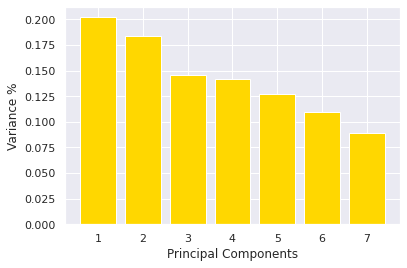

In [377]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

U slucaju da smo imali na stotine feature, PCA i Variance procenat bi nam rekao u kojim labelama se najveca varijansa nalazi. Tipican cilj PCA je da smanji dimenzionalnost originalnog feature prostora i da ga projektuje u manji podprostor. U ovom slucaju vidimo da oko 70% varijanse se nalazi u 1-6 principal komponentama. 7. ima svega 0.05, sto ne utice mnogo na rad, medjutim da imamo mnogo njih, ovo bi bio pomocni alat uz pomoc kojeg bismo mozda odabrali pravi model ili kolone, ili samo smanjili dimenzionalnost.

Sada mozemo prikazati odnose nekih od komponenti.

Text(0, 0.5, 'PCA 2')

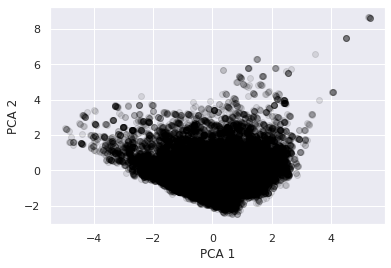

In [378]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 7')

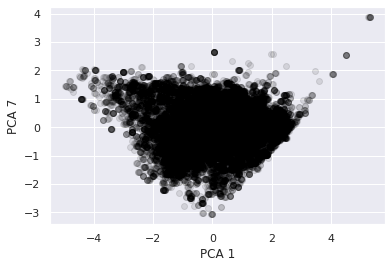

In [379]:
plt.scatter(PCA_components[0], PCA_components[6], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 7')

Text(0, 0.5, 'PCA 3')

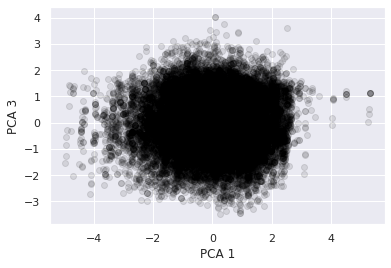

In [380]:
plt.scatter(PCA_components[0], PCA_components[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

### 4.5.2 K-Means Clustering <a name="pca-3"/>

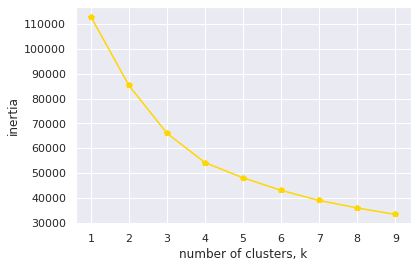

In [381]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

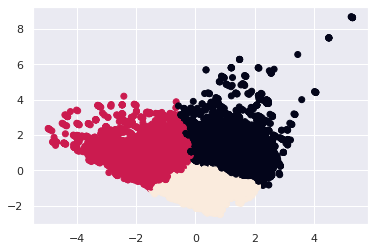

In [382]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [383]:
X = PCA_components
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

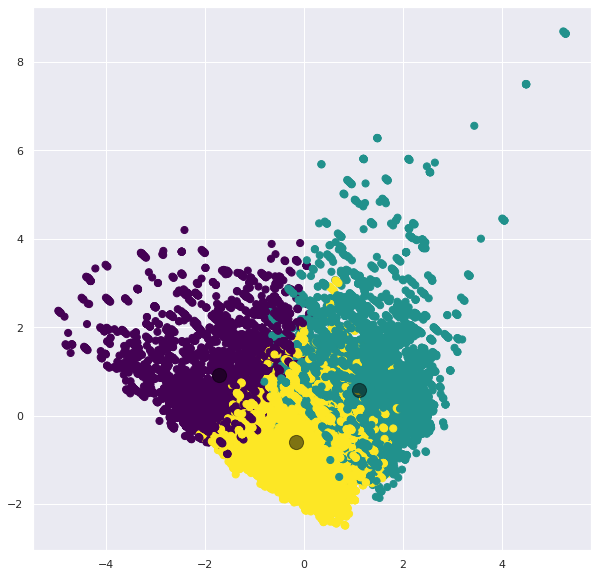

In [384]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

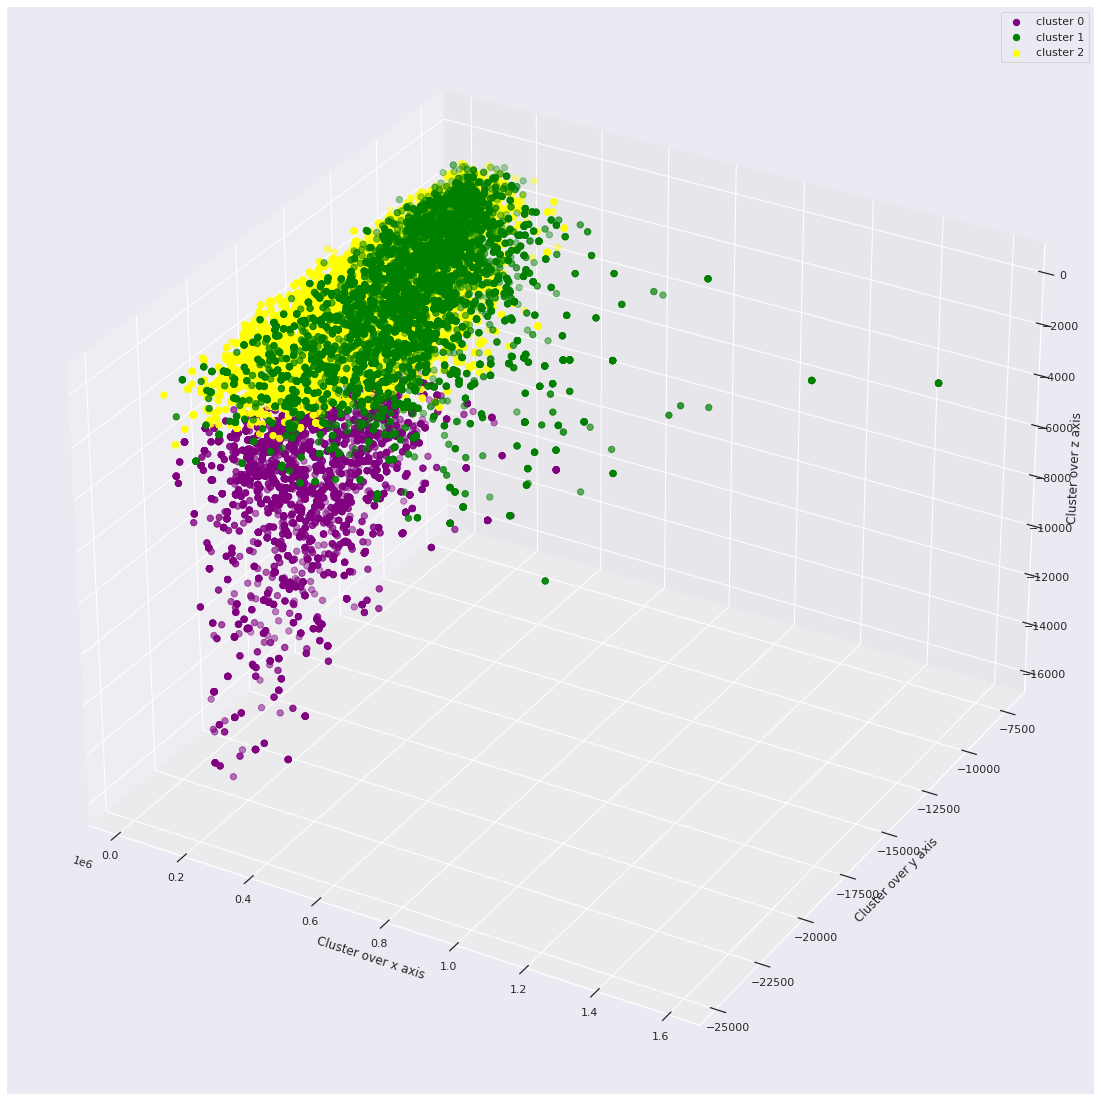

In [385]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],x[y_kmeans == 0,2], s = 40 , color = 'purple', label = "cluster 0")
ax.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],x[y_kmeans == 1,2], s = 40 , color = 'green', label = "cluster 1")
ax.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],x[y_kmeans == 2,2], s = 40 , color = 'yellow', label = "cluster 2")
ax.set_xlabel('Cluster over x axis')
ax.set_ylabel('Cluster over y axis')
ax.set_zlabel('Cluster over z axis')
ax.legend()
plt.show()

In [386]:
print(f'Silhouette Score(n=3): {silhouette_score(X, y_kmeans)}')

Silhouette Score(n=3): 0.17581903528983528


## 5. Hierarchical Clustering <a name="hierarchy"/>

In [387]:
data_scaled = normalize(kdf)
data_scaled = pd.DataFrame(data_scaled, columns=kdf.columns)
data_scaled.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NP_SCORE,NAME_EDUCATION_TYPE_ENC,OCCUPATION_TYPE_ENC,NAME_INCOME_TYPE_ENC
0,0.999550,-0.028069,-0.010620,0.000028,0.000002,0.000042,0.000009
1,0.999550,-0.028069,-0.010620,0.000026,0.000002,0.000042,0.000009
2,0.982217,-0.187486,-0.009901,0.000140,0.000035,0.000148,0.000035
3,0.997441,-0.070597,-0.011271,0.000004,0.000015,0.000055,0.000000
4,0.997441,-0.070597,-0.011271,0.000018,0.000015,0.000055,0.000000


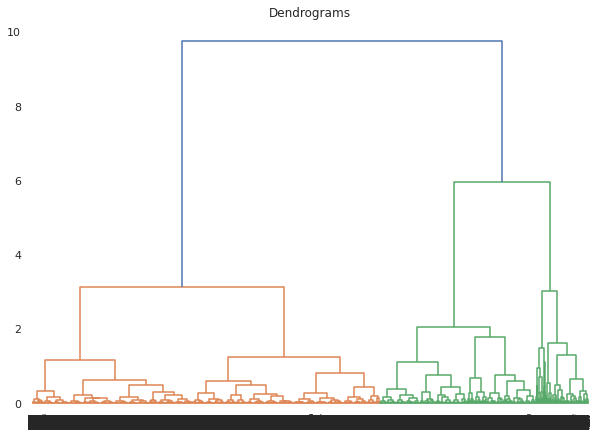

In [388]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

## 6. Gaussian Mixture Models <a name="gauss"/>

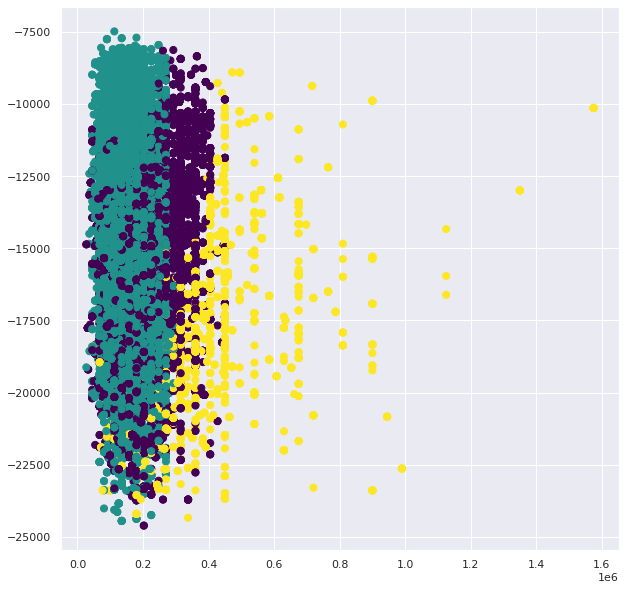

In [389]:
from sklearn import mixture

X = kdf
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(X)
labels = gmm.predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

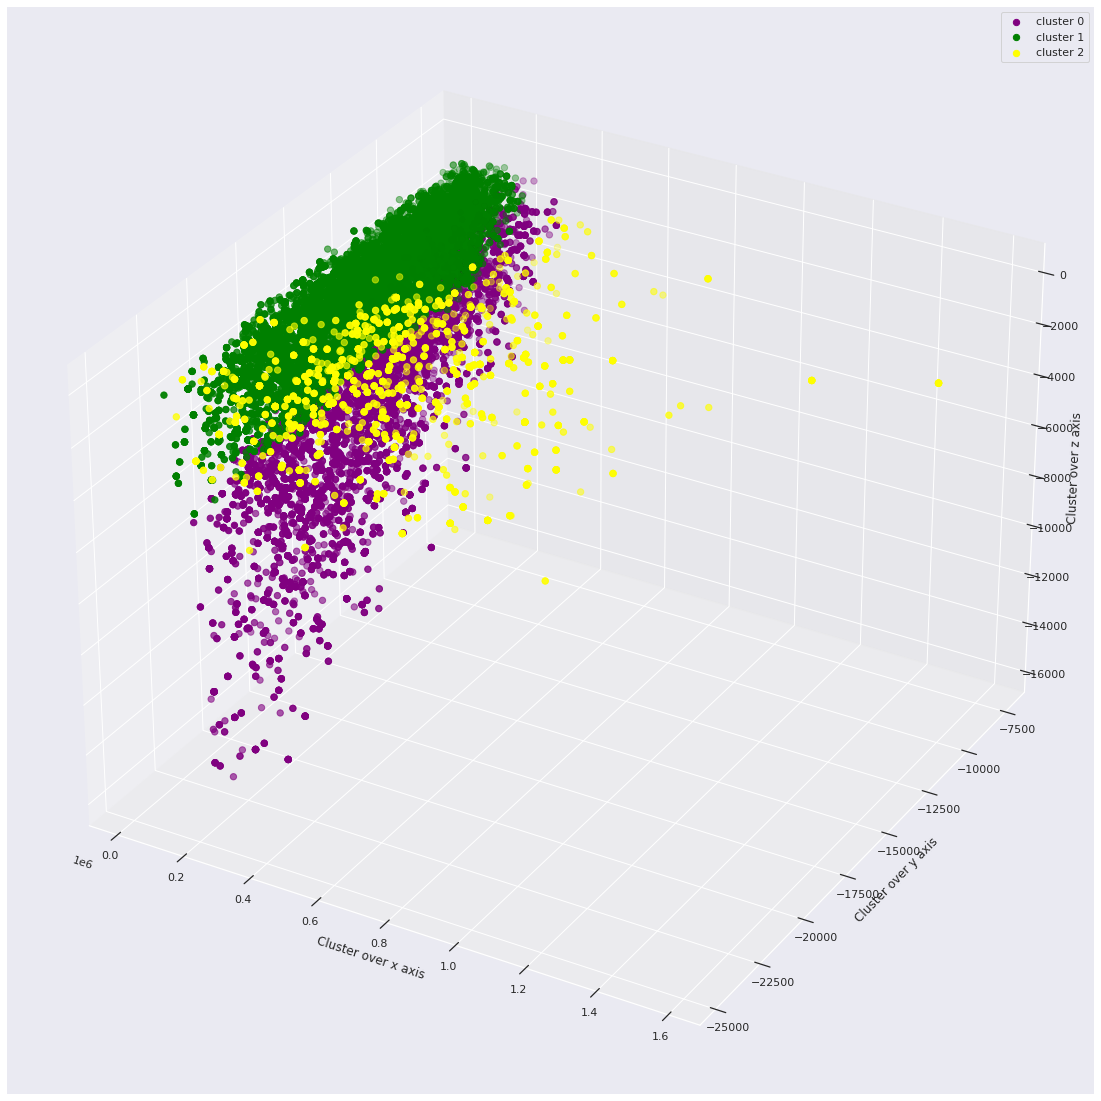

In [390]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[labels == 0,0],x[labels == 0,1],x[labels == 0,2], s = 40 , color = 'purple', label = "cluster 0")
ax.scatter(x[labels == 1,0],x[labels == 1,1],x[labels == 1,2], s = 40 , color = 'green', label = "cluster 1")
ax.scatter(x[labels == 2,0],x[labels == 2,1],x[labels == 2,2], s = 40 , color = 'yellow', label = "cluster 2")
ax.set_xlabel('Cluster over x axis')
ax.set_ylabel('Cluster over y axis')
ax.set_zlabel('Cluster over z axis')
ax.legend()
plt.show()

In [391]:
print(f'Silhouette Score(n=3): {silhouette_score(X, labels)}')

Silhouette Score(n=3): 0.19638790867911843


## 7. Cluster Analysis - K-Means <a name="analysis"/>

Za cluster analysis cemo koristiti K-Means, koji je dao najbolje rezultate. Uzmimo dataframe koji u sebi ima sve "kljucne" kolone, koje po nekoj intuiciji mogu biti zanimljive prilikom odredjivanja kreditnog "statusa".

In [392]:
X

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NP_SCORE,NAME_EDUCATION_TYPE_ENC,OCCUPATION_TYPE_ENC,NAME_INCOME_TYPE_ENC
0,427500.0,-12005,-4542,12,1,18,4
1,427500.0,-12005,-4542,11,1,18,4
2,112500.0,-21474,-1134,16,4,17,4
3,270000.0,-19110,-3051,1,4,15,0
4,270000.0,-19110,-3051,5,4,15,0
...,...,...,...,...,...,...,...
30317,157500.0,-10808,-1739,-6,4,3,4
30318,157500.0,-10808,-1739,18,4,3,4
30319,157500.0,-10808,-1739,-11,4,3,4
30320,157500.0,-10808,-1739,-2,4,3,4


Da ne bismo remetili drugi dataframe, koji se gore koristi, napravicemo kopiju i nastaviti sa njom.

In [393]:
cdf = X.copy()
cdf

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NP_SCORE,NAME_EDUCATION_TYPE_ENC,OCCUPATION_TYPE_ENC,NAME_INCOME_TYPE_ENC
0,427500.0,-12005,-4542,12,1,18,4
1,427500.0,-12005,-4542,11,1,18,4
2,112500.0,-21474,-1134,16,4,17,4
3,270000.0,-19110,-3051,1,4,15,0
4,270000.0,-19110,-3051,5,4,15,0
...,...,...,...,...,...,...,...
30317,157500.0,-10808,-1739,-6,4,3,4
30318,157500.0,-10808,-1739,18,4,3,4
30319,157500.0,-10808,-1739,-11,4,3,4
30320,157500.0,-10808,-1739,-2,4,3,4


Sada cemo na taj dataframe dodati novu kolonu "cluster", koja je napravljena na osnovu K-means algoritma i ima vrednosti 0, 1 ili 2. Kao rezultat, dobicemo novi dataframe, koji mozemo dalje koristiti za analizu onoga sto je K-means odredio kao clustere.

In [394]:
cdf['cluster'] = y_kmeans.tolist()
cdf.describe()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NP_SCORE,NAME_EDUCATION_TYPE_ENC,OCCUPATION_TYPE_ENC,NAME_INCOME_TYPE_ENC,cluster
count,3.032200e+04,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000,30322.000000
mean,1.943934e+05,-14803.080700,-2645.503694,4.743454,3.023283,9.632313,2.681090,1.376624
std,1.044873e+05,3506.176218,2357.407681,17.365060,1.370049,5.690852,1.771913,0.740338
min,2.700000e+04,-24611.000000,-15713.000000,-61.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,-17465.000000,-3505.000000,-6.000000,1.000000,4.000000,0.000000,1.000000
50%,1.800000e+05,-14550.500000,-1992.000000,1.000000,4.000000,8.000000,4.000000,2.000000
75%,2.250000e+05,-11945.000000,-978.000000,15.000000,4.000000,15.000000,4.000000,2.000000
max,1.575000e+06,-7489.000000,-17.000000,61.000000,4.000000,19.000000,4.000000,2.000000


U cluster_0, 1 i 2 cemo izdvojiti sve redove na osnovu uslova kojem clusteru pripadaju. cluster_0 ce biti dataframe za sve vrednosti koje u "cluster" imaju vrednosti 0 itd. Ovo moze biti korisno za kasnije prilikom vizuelizacije.

In [395]:
cluster_0 = cdf[cdf['cluster'] == 0]
cluster_1 = cdf[cdf['cluster'] == 1]
cluster_2 = cdf[cdf['cluster'] == 2]

Sada mozemo poceti sa vizuelnim eksperimentima. Grafici ce biti sledeceg formata:\
x-osa ce svuda biti AMT_INCOME_TOTAL.\
y-osa ce biti svaka od kolona\
hue vrednost ce biti redni broj clustera - 0, 1 ili 2.

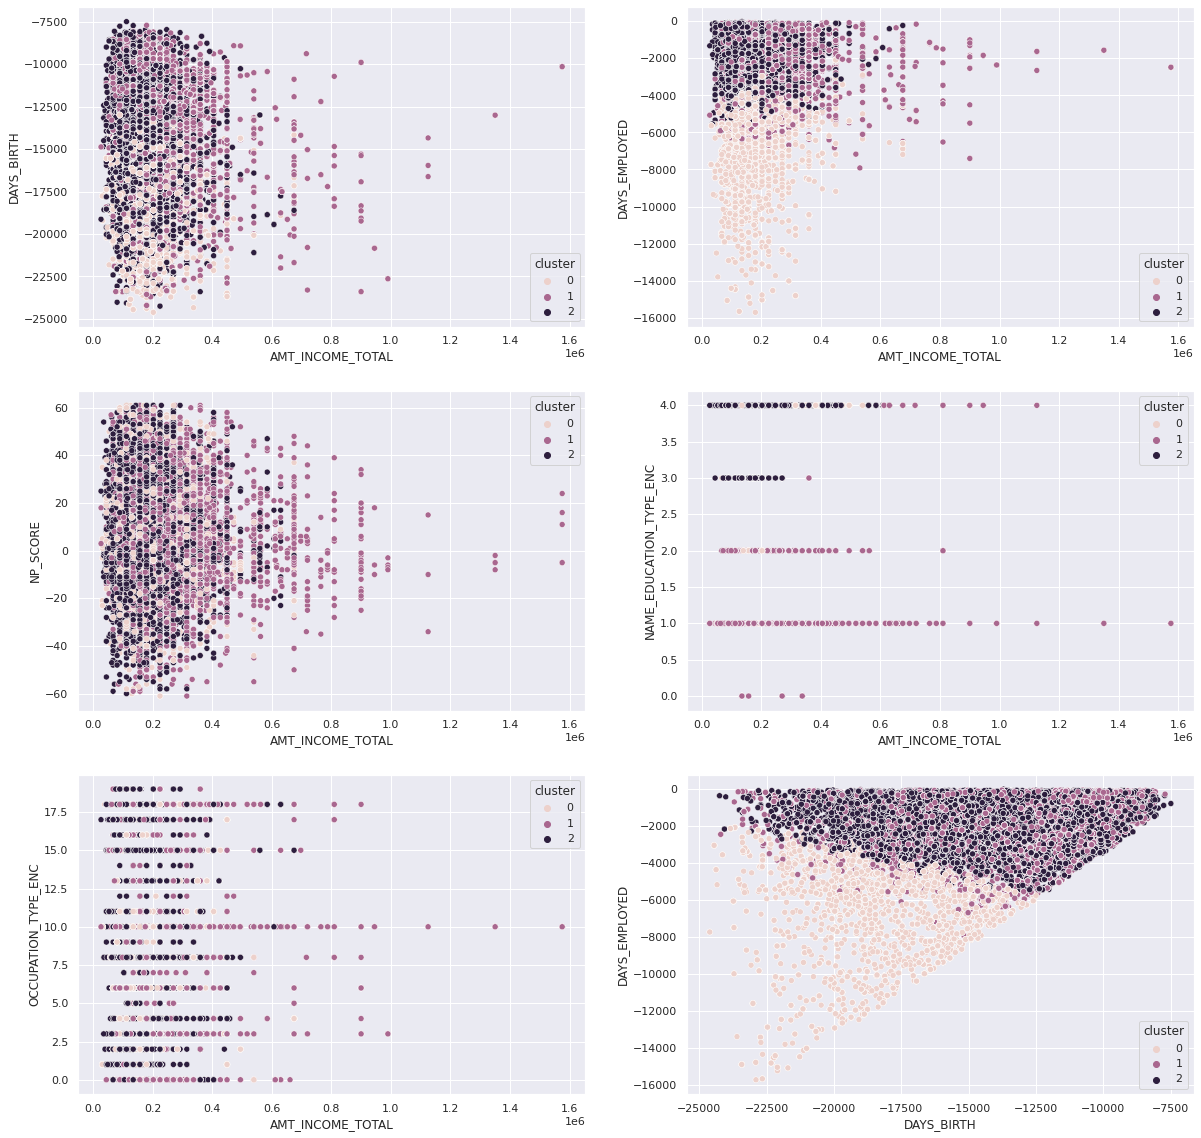

In [400]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.set_theme(style='darkgrid')
sns.scatterplot(ax=ax[0][0], x=cdf.AMT_INCOME_TOTAL, y=cdf.DAYS_BIRTH, hue=cdf.cluster, data=cdf)
sns.scatterplot(ax=ax[0][1], x=cdf.AMT_INCOME_TOTAL, y=cdf.DAYS_EMPLOYED, hue=cdf.cluster, data=cdf)
sns.scatterplot(ax=ax[1][0], x=cdf.AMT_INCOME_TOTAL, y=cdf.NP_SCORE, hue=cdf.cluster, data=cdf)
sns.scatterplot(ax=ax[1][1], x=cdf.AMT_INCOME_TOTAL, y=cdf.NAME_EDUCATION_TYPE_ENC, hue=cdf.cluster, data=cdf)
sns.scatterplot(ax=ax[2][0], x=cdf.AMT_INCOME_TOTAL, y=cdf.OCCUPATION_TYPE_ENC, hue=cdf.cluster, data=cdf)
sns.scatterplot(ax=ax[2][1], x=cdf.DAYS_BIRTH, y=cdf.DAYS_EMPLOYED, hue=cdf.cluster, data=cdf)

plt.show()

Kako bismo lakse tumacili grafove, zgodno bi bilo da imamo "reverse mapping" za encoded vrednosti.

In [397]:
tmp_df = mdf[['NAME_INCOME_TYPE', 'NAME_INCOME_TYPE_ENC']]
result_df = tmp_df.drop_duplicates(subset=['NAME_INCOME_TYPE', 'NAME_INCOME_TYPE_ENC'], keep='first')
print(result_df)

          NAME_INCOME_TYPE  NAME_INCOME_TYPE_ENC
0                  Working                     4
3     Commercial associate                     0
51           State servant                     2
638              Pensioner                     1
1067               Student                     3


Ovde vidimo da su working mapirani u broj 4, pensioneri u broj 1 itd.

Sada cemo isto to uraditi i za OCCUPATION_TYPE, ima 19 razlicitih vrednosti.

In [398]:
tmp_df = mdf[['OCCUPATION_TYPE', 'OCCUPATION_TYPE_ENC']]
result_df = tmp_df.drop_duplicates(subset=['OCCUPATION_TYPE', 'OCCUPATION_TYPE_ENC'], keep='first')
print(result_df)

            OCCUPATION_TYPE  OCCUPATION_TYPE_ENC
0                   Unknown                   18
2            Security staff                   17
3               Sales staff                   15
7               Accountants                    0
8                  Laborers                    8
23                 Managers                   10
29                  Drivers                    4
51               Core staff                    3
118   High skill tech staff                    6
149          Cleaning staff                    1
195   Private service staff                   13
435           Cooking staff                    2
578      Low-skill Laborers                    9
638                 Pension                   12
695          Medicine staff                   11
807             Secretaries                   16
1270   Waiters/barmen staff                   19
1423               HR staff                    5
2803          Realty agents                   14
3198               I

In [399]:
tmp_df = mdf[['NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE_ENC']]
result_df = tmp_df.drop_duplicates(subset=['NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE_ENC'], keep='first')
print(result_df)

                NAME_EDUCATION_TYPE  NAME_EDUCATION_TYPE_ENC
0                  Higher education                        1
2     Secondary / secondary special                        4
14                Incomplete higher                        2
386                 Lower secondary                        3
1475                Academic degree                        0


**Graf 1 - pozicija [ 0 ][ 0 ]:**
   - U donjem delu slike se nalazi najveci deo cluster 0. Iz ovoga se moze zakljuciti da je sa vecim brojem godina, veca verovatnoca pripadanja clusteru 0. Deluje da ovo takodje znaci i povecanje verovatnoce za kreditne usluge.

**Graf 2 - pozicija [ 0 ][ 1 ]:**
   - Od slih slika ovde se najjasnije moze videti podela cluster 0. Deluje da oni koji su preko 4000 dana zaposleni (sto je otprilike 10 godina) pripadaju clusteru 0. Ovo ih takodje svrstava u kategoriju sa povecanom verovatnocom dobijanja kreditnih usluga. Takodje, moze se primetiti da oni koji ne pripadaju clusteru 0, imaju vece maksimume plata. To bi znacilo da oni koji su manje godina zaposleni imaju u proseku vece plate. Ovo se moze povezati sa novim zanimanjima novog doba, gde mnogi mladi ljudi, pre svega iz IT sektora imaju izuzetno visoke plate zbog aktuelnosti samog posla i vremena u kome zivimo.
   
Moze se primetiti i to da svi koji imaju visoka primanja pripadaju clusteru 1. Potrebno je domensko znanje o davanju kredita i rejtinga, ali deluje da oni koji imaju visoka primanja imaju i vece sanse za to. Na osnovu toga, moze se primetiti da oni koji imaju vise obrazovanje (higher education) imaju vece sanse nego oni koji imaju nize obrazovanje (secondary).
Na poslednjoj slici [ 2 ][ 1 ] se moze primetiti da sto su vece godine zivota smanjuje se nezaposlenost, sto je povezano sa kreditnim statusom zbog povezanosti duzine zaposlenja.

## 8. Conclusion <a name="conclusion"/>

Na osnovu eksperimenata moze se zakljuciti da je K-Means dao najbolje podele u smislu clustera. Dalje, kroz vizuelizaciju se moze donekle razumeti smisao clustera koji je dobijen. Sto se rezultata tice, oni se mogu razumeti na vise nacina. Jedan od ociglednih rezultata je to sto se najjasnije vide oni kojima je kreditni rejting najslabiji, odnosno oni koji imaju najmanje mogucnosti. Opet, sve je to u domenu verovatnoce, sto se takodje vidi na slikama, a to je da ne postoji crno-bela podela na osnovu svega sto se u ovom radu nalazi. U zavisnosti od starosti, primanja, i stepena edukacije (koja sa sobom povlaci i odredjenu titulu ili posao) raste ili opada verovatnoca, pa samim tim clusteri 0, 1 i 2 sadrze odredjene vrednosti. Na kraju, AMT_INCOME_TOTAL daje dobre sanse sto je veca vrednost. Ovo se moze objasniti time sto velike plate povlace sve ostale kriterijume, zaposlenost, dobru poziciju, visoko obrazovanje itd. iz kojih visoke zarade na kraju i nastaju.